In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data), len(train_labels), len(test_data), len(test_labels))

from sklearn.model_selection  import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  random_state=5, test_size=.25)
x_test, y_test = test_data.copy(), test_labels.copy()
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(set(y_train)))

8982 8982 2246 2246
6736
2246
2246
46


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(x_test)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
y_val = utils.to_categorical(y_val)

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0

### 모델 학습

In [6]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train,
                               epochs=100,
                               batch_size=512,
                               validation_data=(x_val, y_val),
                               callbacks = [check_point_cb,early_stopping_cb])

Epoch 1/100
14/14 [==============================] - 2s 46ms/step - loss: 3.1283 - accuracy: 0.3039 - val_loss: 3.4690 - val_accuracy: 0.5784
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 1.9193 - accuracy: 0.5698 - val_loss: 3.0098 - val_accuracy: 0.6411
Epoch 3/100
14/14 [==============================] - 0s 16ms/step - loss: 1.4873 - accuracy: 0.6624 - val_loss: 2.6758 - val_accuracy: 0.6768
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 1.2708 - accuracy: 0.7032 - val_loss: 2.4448 - val_accuracy: 0.6999
Epoch 5/100
14/14 [==============================] - 0s 15ms/step - loss: 1.1245 - accuracy: 0.7362 - val_loss: 2.2407 - val_accuracy: 0.7146
Epoch 6/100
14/14 [==============================] - 0s 15ms/step - loss: 1.0096 - accuracy: 0.7637 - val_loss: 2.0602 - val_accuracy: 0.7240
Epoch 7/100
14/14 [==============================] - 0s 16ms/step - loss: 0.9167 - accuracy: 0.7841 - val_loss: 1.8898 - val_accuracy: 0.7378
Epoch 

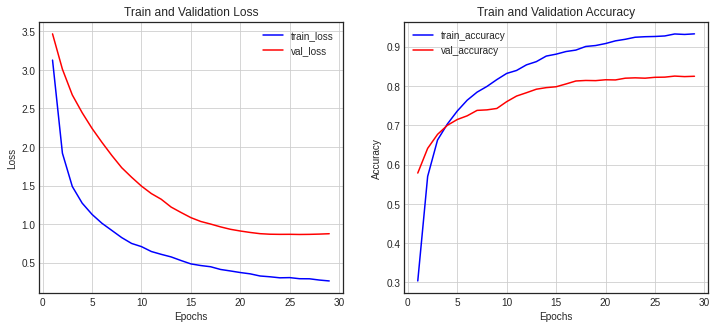

In [7]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('seaborn-white')

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

loss, accuracy = model.evaluate(x_test, y_test)
print('TESTSET Loss :',loss)
print('TESTSET Accuracy :',accuracy)

71/71 [==============================] - 0s 3ms/step - loss: 0.9839 - accuracy: 0.8032
TESTSET Loss : 0.9838854074478149
TESTSET Accuracy : 0.8032057285308838
